In [38]:
import numpy as np
from itertools import product

def show_kernel(kernel, label = True, digits = None, text_size = 28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)
    
    # plotting kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap = cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min()) / 2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val,
                    color = color, size = text_size, 
                    horizontalalignment = 'center',
                    verticalalignment = 'center')
    plt.xticks([])
    plt.yticks([])
    

In [2]:
# importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter('ignore')

In [3]:
print(tf.__version__)

2.12.0


In [4]:
# matplotlib congifuration
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [5]:
# matplotlib defaults
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)
plt.rc('image', cmap = 'magma' )

In [6]:
image_path = '../input/computer-vision-resources/car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

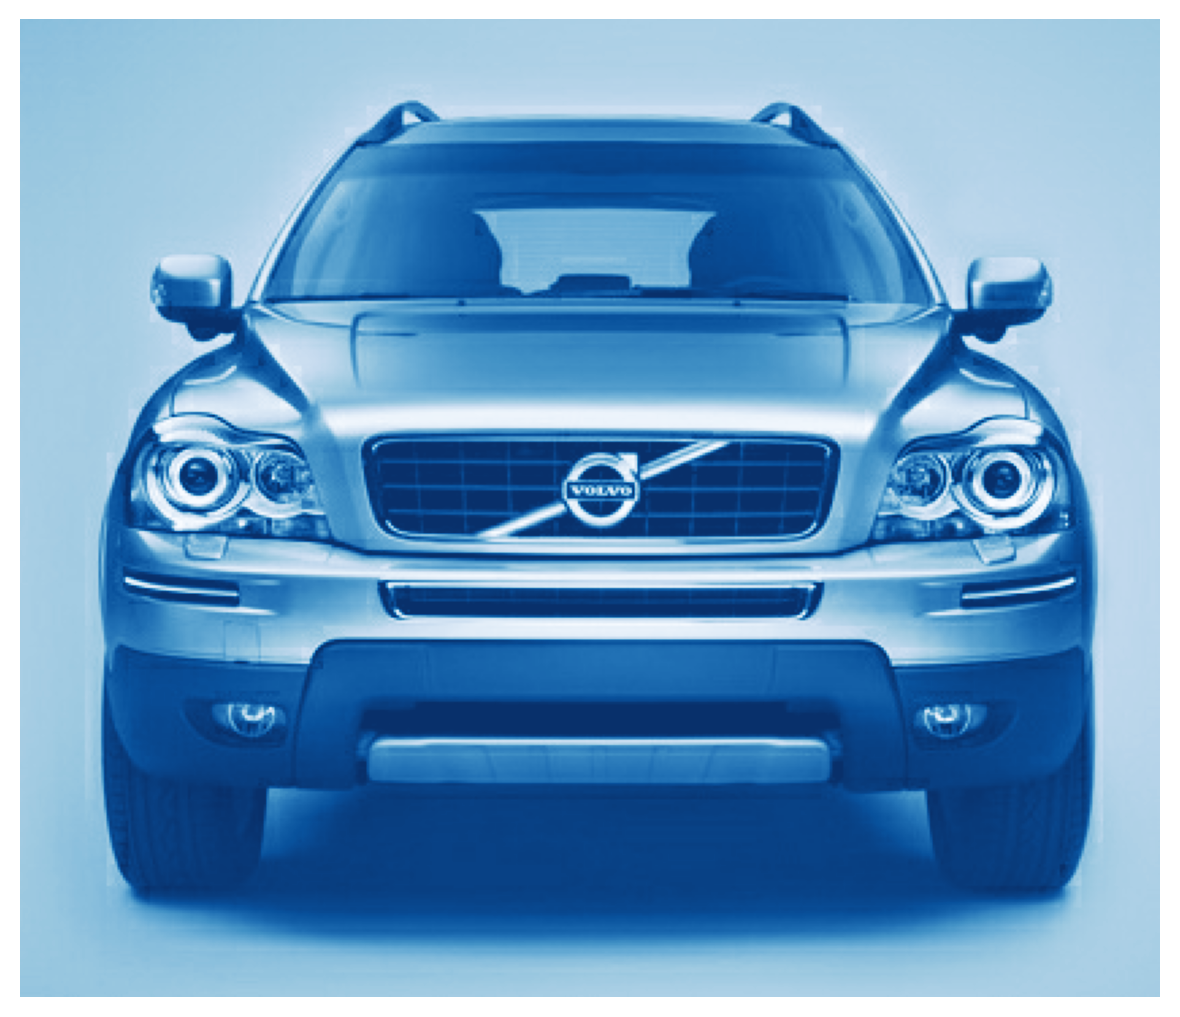

In [35]:
plt.figure(figsize = (6,6))
plt.imshow(tf.squeeze(image), cmap = 'Blues_r')
plt.axis('off')
plt.show();

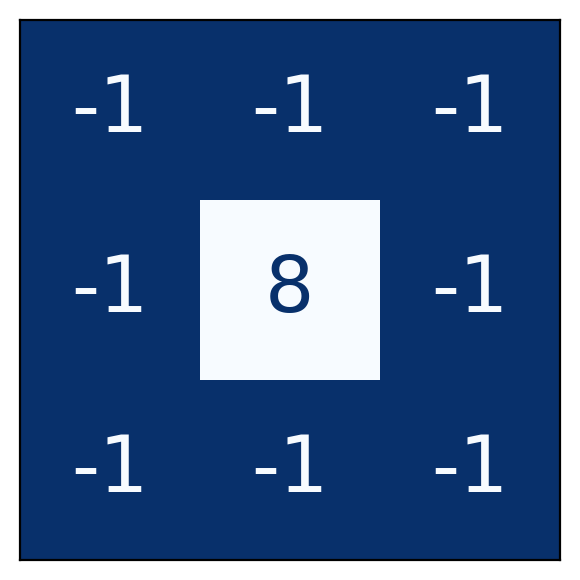

In [39]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

In [11]:
# Reformat for batch compatibility
image = tf.image.convert_image_dtype(image, dtype = tf.float32)
image = tf.expand_dims(image, axis = 0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

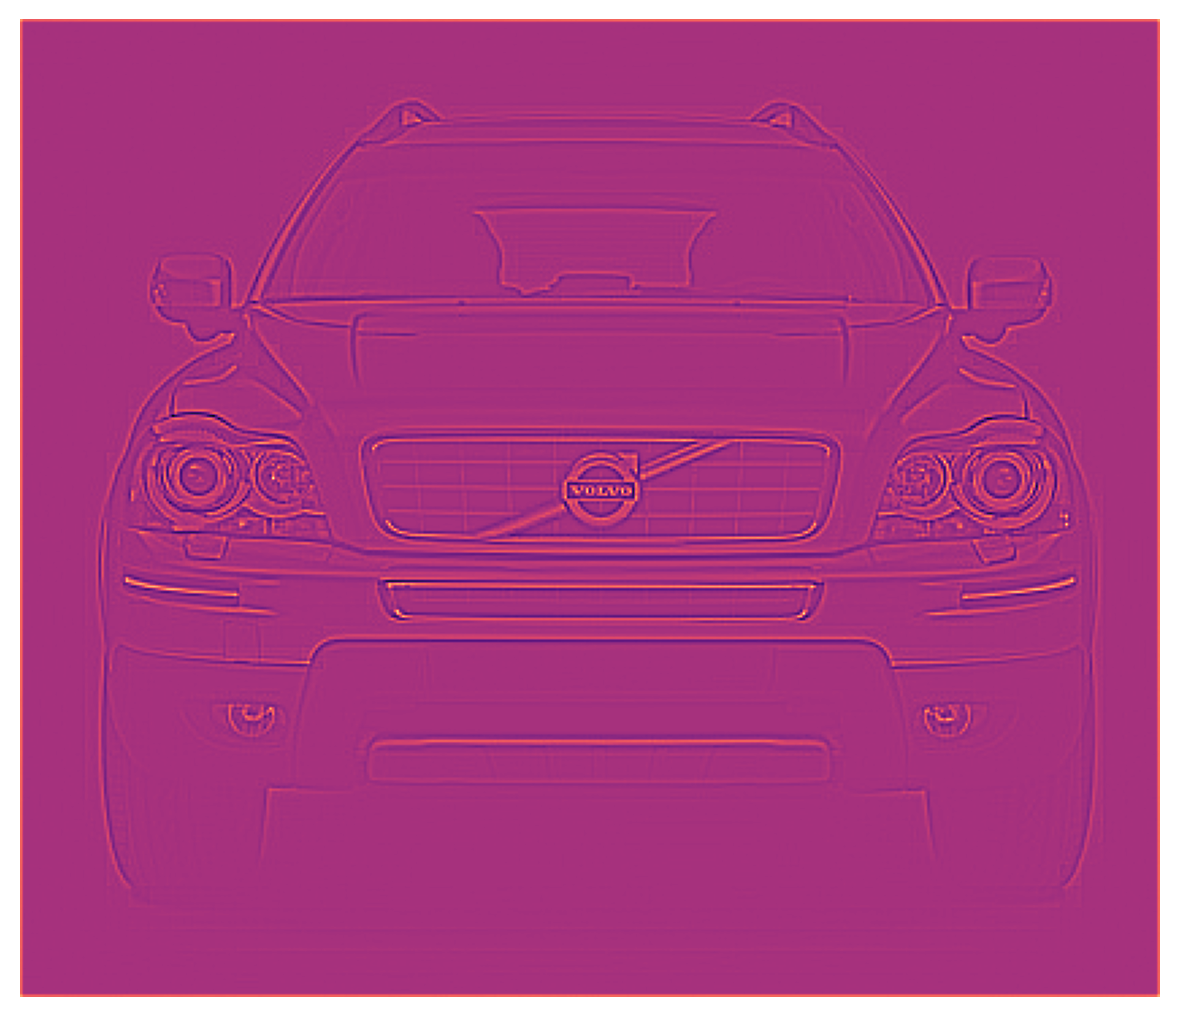

In [12]:
image_filter = tf.nn.conv2d(input = image,
                           filters = kernel,
                           strides = 1,
                           padding = 'SAME')
plt.figure(figsize = (6,6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

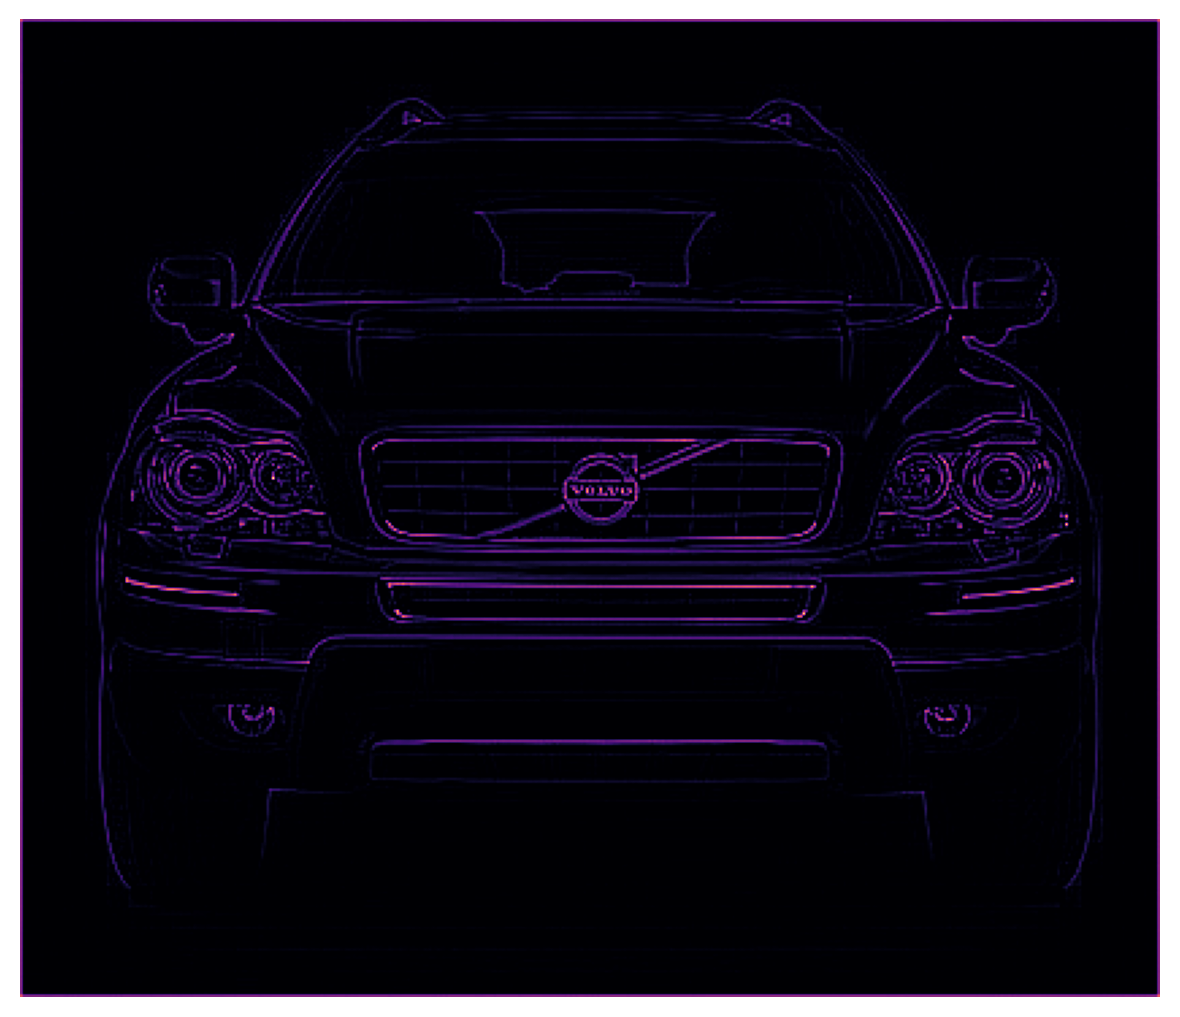

In [13]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();